In [26]:
import pandas as pd
import matplotlib.pyplot as plt


In [30]:
loan1 = pd.read_csv("Loan 1.csv", encoding = "ISO-8859-1")
loan2 = pd.read_csv("Loan 2.csv", encoding = "ISO-8859-1")

In [31]:
# go for outer merge of both data
#merged_df = pd.merge(loan1, loan2, on='Customer ID', how='outer')
merged_df = pd.concat([loan1, loan2], ignore_index=True)

In [32]:
# Display the first few rows of the merged dataframe
print(merged_df.head())

  Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  ...  Credit Score No. of Defaults  \
0                  137088.98  ...        799.14               0   
1                  104771.59  ...        833.31 

 print(merged_df.isnull().sum())

In [20]:
print(merged_df.describe)

<bound method NDFrame.describe of       Customer ID            Name_x Gender_x  Age_x  Income (USD)_x  \
0         C-26247  Tandra Olszewski        F   47.0         3472.69   
1         C-35067     Jeannette Cha        F   57.0         1184.84   
2         C-34590      Keva Godfrey        F   52.0         1266.27   
3         C-16668      Elva Sackett        M   65.0         1369.72   
4         C-12196    Sade Constable        F   60.0         1939.23   
...           ...               ...      ...    ...             ...   
49995     C-43723               NaN      NaN    NaN             NaN   
49996     C-32511               NaN      NaN    NaN             NaN   
49997      C-5192               NaN      NaN    NaN             NaN   
49998     C-12172               NaN      NaN    NaN             NaN   
49999     C-33003               NaN      NaN    NaN             NaN   

      Income Stability_x          Profession_x Type of Employment_x  \
0                    Low  Commercial assoc

In [21]:
# # Drop columns with more than 60% missing values
# threshold = len(merged_df) * 0.6
# merged_df = merged_df.dropna(thresh=threshold, axis=1)

# print("Remaining columns after dropping:\n", merged_df.isnull().sum())

In [36]:
merged_df['Income (USD)'].fillna(merged_df['Income (USD)'].mean(), inplace=True)

In [43]:
merged_df['Income Stability'].fillna(merged_df['Income Stability'].mode()[0], inplace=True)
merged_df['Gender'].fillna(merged_df['Gender'].mode()[0], inplace=True)

In [44]:
print(merged_df.isnull().sum())

Customer ID                        0
Name                               0
Gender                             0
Age                                0
Income (USD)                       0
Income Stability                   0
Profession                         0
Type of Employment             11959
Location                           0
Loan Amount Request (USD)          0
Current Loan Expenses (USD)      255
Expense Type 1                     0
Expense Type 2                     0
Dependents                      3635
Credit Score                    2446
No. of Defaults                    0
Has Active Credit Card          2642
Property ID                        0
Property Age                    5742
Property Type                      0
Property Location                516
Co-Applicant                       0
Property Price                     0
Loan Sanction Amount (USD)     20340
dtype: int64


In [40]:
pd.set_option('display.max_columns', 50)

In [42]:
print(merged_df.head())

  Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  137088.98                       396.72              N   
1                  104771.59  

In [45]:


# Inspect the relevant columns
print(merged_df[['Property Age', 'Loan Sanction Amount (USD)']].head())
print(merged_df[['Property Age', 'Loan Sanction Amount (USD)']].describe())
print(merged_df[['Property Age', 'Loan Sanction Amount (USD)']].isnull().sum())

   Property Age  Loan Sanction Amount (USD)
0       3472.69                         NaN
1       1184.84                         NaN
2       1266.27                         NaN
3       1369.72                         NaN
4       1939.23                         NaN
       Property Age  Loan Sanction Amount (USD)
count  4.425800e+04                29660.000000
mean   2.589233e+03                47649.342208
std    8.585456e+03                48221.146686
min    3.685900e+02                 -999.000000
25%    1.654303e+03                    0.000000
50%    2.222370e+03                35209.395000
75%    3.088225e+03                74261.250000
max    1.777460e+06               481907.320000
Property Age                   5742
Loan Sanction Amount (USD)    20340
dtype: int64


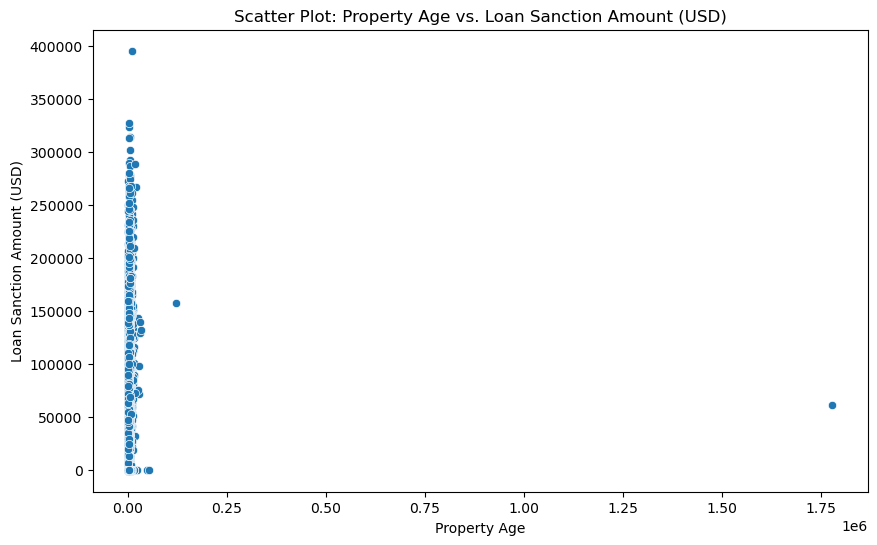

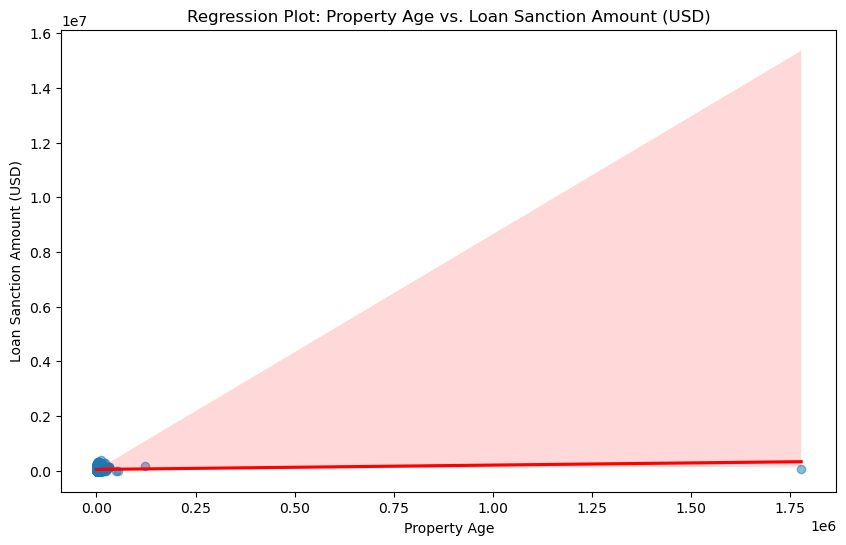

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Property Age', y='Loan Sanction Amount (USD)', data=merged_df)
plt.title('Scatter Plot: Property Age vs. Loan Sanction Amount (USD)')
plt.xlabel('Property Age')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Property Age', y='Loan Sanction Amount (USD)', data=merged_df, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Regression Plot: Property Age vs. Loan Sanction Amount (USD)')
plt.xlabel('Property Age')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

Pearson Correlation Coefficient: 0.03779625302729863
P-Value: 2.431696277637738e-09
Intercept: 45407.221579160854
Slope: 0.1595477827568337


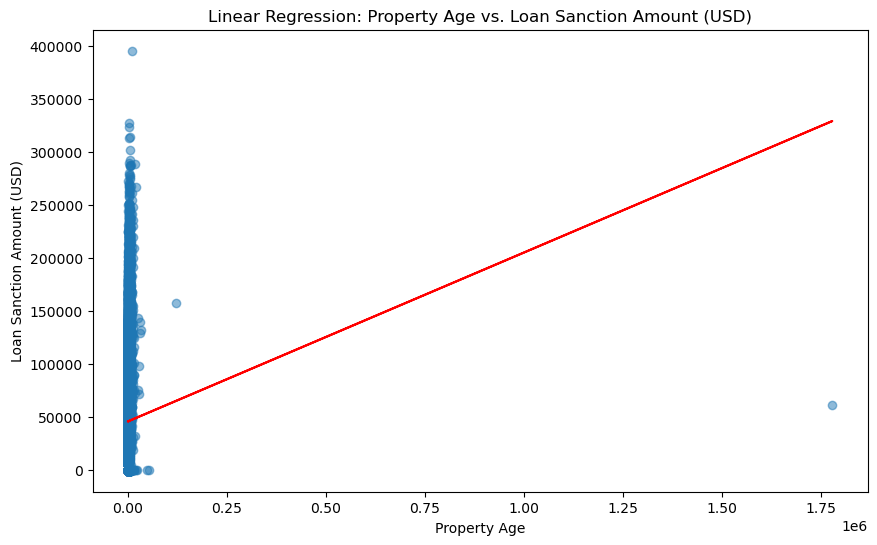

R-Squared: 0.0014285567429036528


In [47]:
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import numpy as np

# Drop rows with missing values in the relevant columns
df_clean = merged_df[['Property Age', 'Loan Sanction Amount (USD)']].dropna()

# Calculate the correlation coefficient
correlation, p_value = pearsonr(df_clean['Property Age'], df_clean['Loan Sanction Amount (USD)'])
print(f"Pearson Correlation Coefficient: {correlation}")
print(f"P-Value: {p_value}")

# Prepare the data for linear regression
X = df_clean[['Property Age']].values.reshape(-1, 1)
y = df_clean['Loan Sanction Amount (USD)']

# Initialize and fit the regression model
model = LinearRegression()
model.fit(X, y)

# Print the model coefficients
intercept = model.intercept_
slope = model.coef_[0]
print(f"Intercept: {intercept}")
print(f"Slope: {slope}")

# Predict the Loan Sanction Amount (USD) using the model
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df_clean['Property Age'], df_clean['Loan Sanction Amount (USD)'], alpha=0.5)
plt.plot(df_clean['Property Age'], y_pred, color='red')
plt.title('Linear Regression: Property Age vs. Loan Sanction Amount (USD)')
plt.xlabel('Property Age')
plt.ylabel('Loan Sanction Amount (USD)')
plt.show()

# Calculate and print the R-squared value
r_squared = model.score(X, y)
print(f"R-Squared: {r_squared}")